# Data Visualization & Processing

In [1]:
import numpy as np

## Loading Data

In [2]:
X = [] # Features per class
y = [] # Labels
N = 5250 # Amount of data we want to use max: 5250

# Import the features
with open("traindata.txt", "r") as file:
    for line in file.readlines()[:N]:
        features = [float(i) for i in line.split(",")]
        X.append(features)

# Import the labels
with open("trainlabels.txt", "r") as file:
    for line in file.readlines()[:N]:
        label = float(line.rstrip())
        y.append(label)
    
# Convert data to numpy arrays
X = np.array(X)
y = np.array(y, dtype=np.int32)

## Data Preprocessing

In [5]:
from sklearn.preprocessing import Normalizer

In [25]:
normalizer = Normalizer(norm='l2')

x = X[14, :-1]
orientations = X[:, -1] # 4 orientations: 0, 1, 2, 3
print(np.unique(orientations))

print(x[0])

filtered_x = x[x >= 0]
image = filtered_x.reshape([32, 32])

normalized_image = image

[0. 1. 2. 3.]
64.14180755615234


## Visualize Image

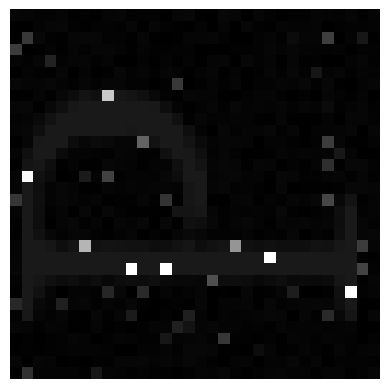

In [26]:
import matplotlib.pyplot as plt

plt.imshow(normalized_image, cmap='gray', interpolation='nearest')
plt.axis("off")
plt.show()